In [19]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [18]:
# Define text preprocessing parameters
vocab_size = 10000 # Vocabulary size
embedding_dim = 16 # Dimensionality of embedding vectors
max_length = 100 # Maximum sequence length
trunc_type='post' # Truncation type (post)
padding_type='post' # Padding type (post)
oov_tok = "<OOV>" # Token for unknown words

In [2]:
# Load training data
df_train = pd.read_csv('twitter_training.csv')
df_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
# Preprocess training data
df_train.rename(columns={'2401':'id',
                         'Positive': 'Sentiment',
                         'im getting on borderlands and i will murder you all ,': 'Text'}, inplace=True)
df_train.columns

Index(['id', 'Borderlands', 'Sentiment', 'Text'], dtype='object')

In [3]:
# Load testing data
df_test = pd.read_csv('twitter_validation.csv')
df_test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
# Preprocess testing data
df_test.rename(columns={'3364': 'id',
                        'Irrelevant': 'Sentiment',
                        'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'Text'}, 
               inplace=True)
df_test.columns

Index(['id', 'Facebook', 'Sentiment', 'Text'], dtype='object')

In [7]:
df_test.Sentiment.unique()

array(['Neutral', 'Negative', 'Positive', 'Irrelevant'], dtype=object)

In [8]:
# Convert sentiment labels to numerical values
df_train['Sentiment'] = df_train['Sentiment'].replace({'Negative': 0, 'Neutral': 1, 'Positive': 2, 'Irrelevant': 3})
df_test['Sentiment'] = df_test['Sentiment'].replace({'Negative': 0, 'Neutral': 1, 'Positive': 2, 'Irrelevant': 3})

In [15]:
# Drop rows with missing values
df_train = df_train.dropna()

In [16]:
df_train.isnull().sum()

id             0
Borderlands    0
Sentiment      0
Text           0
dtype: int64

In [12]:
df_test.isnull().sum()

id           0
Facebook     0
Sentiment    0
Text         0
dtype: int64

In [17]:
training_sentences = df_train['Text']
testing_sentences = df_test['Text']
training_labels = df_train['Sentiment']
testing_labels = df_test['Sentiment']

In [20]:
# Tokenization and sequence preprocessing
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [27]:
# Build the model
model = tf.keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalAveragePooling1D(), 
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_2  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_4 (Dense)             (None, 24)                408       
                                                                 
 dense_5 (Dense)             (None, 4)                 100       
                                                                 
Total params: 160508 (626.98 KB)
Trainable params: 160508 (626.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Train the model
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30


2313/2313 - 6s - loss: 1.2025 - accuracy: 0.4762 - val_loss: 0.9157 - val_accuracy: 0.6386 - 6s/epoch - 2ms/step
Epoch 2/30
2313/2313 - 6s - loss: 0.8598 - accuracy: 0.6628 - val_loss: 0.6335 - val_accuracy: 0.7668 - 6s/epoch - 2ms/step
Epoch 3/30
2313/2313 - 6s - loss: 0.6810 - accuracy: 0.7418 - val_loss: 0.4731 - val_accuracy: 0.8428 - 6s/epoch - 2ms/step
Epoch 4/30
2313/2313 - 6s - loss: 0.5726 - accuracy: 0.7864 - val_loss: 0.3817 - val_accuracy: 0.8709 - 6s/epoch - 2ms/step
Epoch 5/30
2313/2313 - 6s - loss: 0.5030 - accuracy: 0.8126 - val_loss: 0.3301 - val_accuracy: 0.8889 - 6s/epoch - 2ms/step
Epoch 6/30
2313/2313 - 6s - loss: 0.4572 - accuracy: 0.8294 - val_loss: 0.2865 - val_accuracy: 0.9129 - 6s/epoch - 2ms/step
Epoch 7/30
2313/2313 - 6s - loss: 0.4243 - accuracy: 0.8414 - val_loss: 0.2660 - val_accuracy: 0.9179 - 6s/epoch - 2ms/step
Epoch 8/30
2313/2313 - 6s - loss: 0.4020 - accuracy: 0.8499 - val_loss: 0.2477 - val_accuracy: 0.9269 - 6s/epoch - 2ms/step
Epoch 

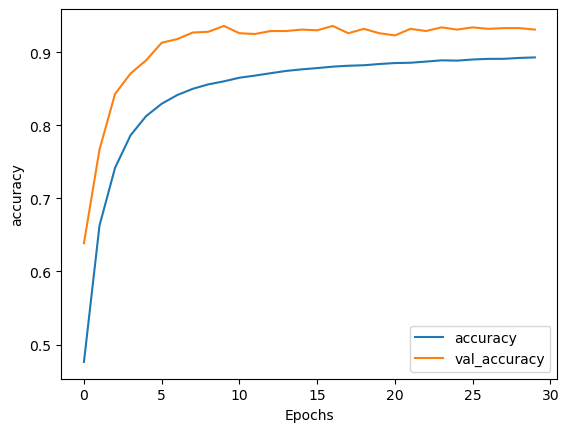

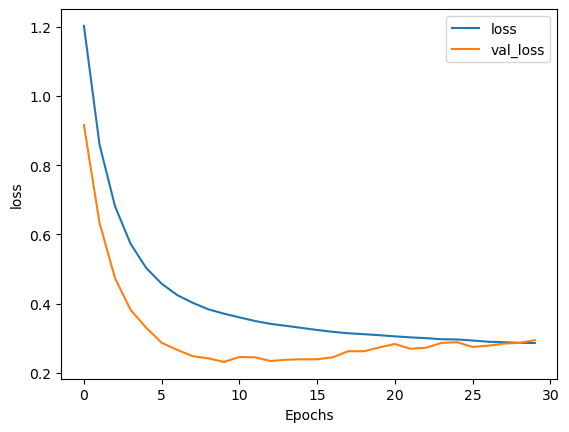

In [30]:
# Visualize results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [38]:
# Prediction on new data
sentence = ['great', 'normal', 'waste', 'trash', 'beauty']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 25ms/step
[[0.04097648 0.05407685 0.84440714 0.06053955]
 [0.26866725 0.00296062 0.67651767 0.05185445]
 [0.9525449  0.00759461 0.0358509  0.00400956]
 [0.85306823 0.07391767 0.06083136 0.01218283]
 [0.00109357 0.06611297 0.9318323  0.00096113]]
